In [1]:
# Imports used the the project

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

In [3]:
df_airports = pd.read_csv("Airports.csv")

In [4]:
print(type(df_airports["Fly_date"][0]))

<class 'numpy.int64'>


In [5]:
df_09 = df_airports[df_airports["Fly_date"]==200909]
df_10 = df_airports[df_airports["Fly_date"]==200910]
df_11 = df_airports[df_airports["Fly_date"]==200911]
df_12 = df_airports[df_airports["Fly_date"]==200912]

all_years_df = pd.concat([df_09, df_10, df_11, df_12], axis=0, ignore_index=True, sort=False)

In [6]:
la_df = all_years_df[all_years_df["Destination_city"] == "Los Angeles, CA"]
la_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
...,...,...,...,...,...,...,...,...,...
67042,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67043,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67044,LAX,LAX,"Los Angeles, CA","Los Angeles, CA",...,0,200912,25749594,25749594


In [7]:
ny_df = all_years_df[all_years_df["Destination_city"] == "New York, NY"]
ny_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
7790,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7791,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7792,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
...,...,...,...,...,...,...,...,...,...
60557,PIT,LGA,"Pittsburgh, PA","New York, NY",...,335,200912,2354957,38139592
60558,PIT,JFK,"Pittsburgh, PA","New York, NY",...,340,200912,2354957,38139592
60559,PVD,LGA,"Providence, RI","New York, NY",...,143,200912,1600642,38139592


Los Angeles

In [8]:
ch_df = all_years_df[all_years_df["Destination_city"] == "Chicago, IL"]
ch_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
3227,MCI,MDW,"Kansas City, MO","Chicago, IL",...,405,200909,2067585,19161134
3228,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3229,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
...,...,...,...,...,...,...,...,...,...
55862,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55863,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55864,IND,MDW,"Indianapolis, IN","Chicago, IL",...,162,200912,1743658,19161134


In [9]:
orl_df = all_years_df[all_years_df["Destination_city"] == "Orlando, FL"]
orl_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
5969,PBI,SFB,"West Palm Beach, FL","Orlando, FL",...,160,200909,5547051,2082421
5970,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5971,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
...,...,...,...,...,...,...,...,...,...
58300,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58301,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58302,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421


In [10]:
sea_df = all_years_df[all_years_df["Destination_city"] == "Seattle, WA"]
sea_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
6785,LWS,SEA,"Lewiston, ID","Seattle, WA",...,261,200909,60643,6815696
6786,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6787,MSO,SEA,"Missoula, MT","Seattle, WA",...,389,200909,108623,6815696
...,...,...,...,...,...,...,...,...,...
59272,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59273,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59274,ELP,SEA,"El Paso, TX","Seattle, WA",...,1368,200912,751296,6815696


Sample Airport Datasets

In [11]:
la_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13681,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13682,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594


In [12]:
sea_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
6785,LWS,SEA,"Lewiston, ID","Seattle, WA",...,261,200909,60643,6815696
6786,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6787,MSO,SEA,"Missoula, MT","Seattle, WA",...,389,200909,108623,6815696
6788,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6789,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696


In [13]:
ch_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
3227,MCI,MDW,"Kansas City, MO","Chicago, IL",...,405,200909,2067585,19161134
3228,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3229,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3230,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3231,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134


In [14]:
ny_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
7790,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7791,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7792,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
7793,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
7794,BDL,JFK,"Hartford, CT","New York, NY",...,106,200909,1195998,38139592


In [15]:
orl_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
5969,PBI,SFB,"West Palm Beach, FL","Orlando, FL",...,160,200909,5547051,2082421
5970,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5971,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5972,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5973,SLC,MCO,"Salt Lake City, UT","Orlando, FL",...,1929,200909,1130293,2082421


# DATA EXPLORATION

In [16]:
la_df['Origin_city'].value_counts()

San Francisco, CA    65
Anchorage, AK        65
Phoenix, AZ          62
                     ..
St. George, UT        1
Little Rock, AR       1
Pullman, WA           1
Name: Origin_city, Length: 98, dtype: int64

In [17]:
sea_df['Origin_city'].value_counts()

Portland, OR       50
Spokane, WA        50
Phoenix, AZ        47
                   ..
San Antonio, TX     1
Eureka, CA          1
El Paso, TX         1
Name: Origin_city, Length: 90, dtype: int64

In [18]:
ch_df['Origin_city'].value_counts()

Detroit, MI       103
Atlanta, GA       101
Anchorage, AK      99
                 ... 
Shreveport, LA      1
Alexandria, LA      1
Asheville, NC       1
Name: Origin_city, Length: 142, dtype: int64

In [19]:
ny_df['Origin_city'].value_counts()

Chicago, IL        108
Washington, DC     100
Boston, MA          66
                  ... 
Columbia, MO         1
Albuquerque, NM      1
El Paso, TX          1
Name: Origin_city, Length: 93, dtype: int64

In [20]:
orl_df['Origin_city'].value_counts()

Washington, DC      55
Philadelphia, PA    47
Houston, TX         45
                    ..
Myrtle Beach, SC     1
Savannah, GA         1
Hattiesburg, MS      1
Name: Origin_city, Length: 111, dtype: int64

In [35]:
test_orl = orl_df['Origin_city'].value_counts()

In [36]:
test_orl[0]

55

# DATA ANALYSIS IDEAS

1. BAR CHART/HISTOGRAM FOR EACH CITY OVER 4 MONTHS
2. BAR CHART/HISTOGRAM FOR EACH MONTH ACROSS 5 CITIES
3. AVERAGE DISTANCE FOR EACH CITY AND OVERALL
4. MODEL WHICH CITY LIKELY WENT TO IF COMING FROM X
5. <b>RELATIONSHIP BETWEEN WEATHER FACTOR AND CHANGE IN BOOKED FLIGHTS</b>

In [82]:
la_we = pd.read_csv("./WEATHERDATA/USEABLE DATA/LAX.csv")
sea_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/SEA.csv")
chi_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/CHI.csv")
nyc_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/NYC.csv")
orl_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/ORL.csv")

In [83]:
la_we = la_we.drop(columns = 'Unnamed: 0')
sea_we = sea_we.drop(columns = 'Unnamed: 0')
chi_we = chi_we.drop(columns = 'Unnamed: 0')
nyc_we = nyc_we.drop(columns = 'Unnamed: 0')
orl_we = orl_we.drop(columns = 'Unnamed: 0')

In [91]:
chi_we = chi_we.drop(columns = 'Unnamed: 0.1')

In [ ]:
nyc_we = nyc_we.drop(columns = 'Unnamed: 0.1')
orl_we = orl_we.drop(columns = 'Unnamed: 0')

In [84]:
la_df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13681,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13682,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594


In [38]:
la_df['Fly_date'].value_counts()

200912    436
200911    390
200910    382
200909    354
Name: Fly_date, dtype: int64

In [55]:
la_fly_date = la_df['Fly_date'].value_counts()[0:4]

In [56]:
la_fly_date

200912    436
200911    390
200910    382
200909    354
Name: Fly_date, dtype: int64

In [45]:
fly_dates = (la_df['Fly_date'].unique())

In [46]:
fly_dates

array([200909, 200910, 200911, 200912])

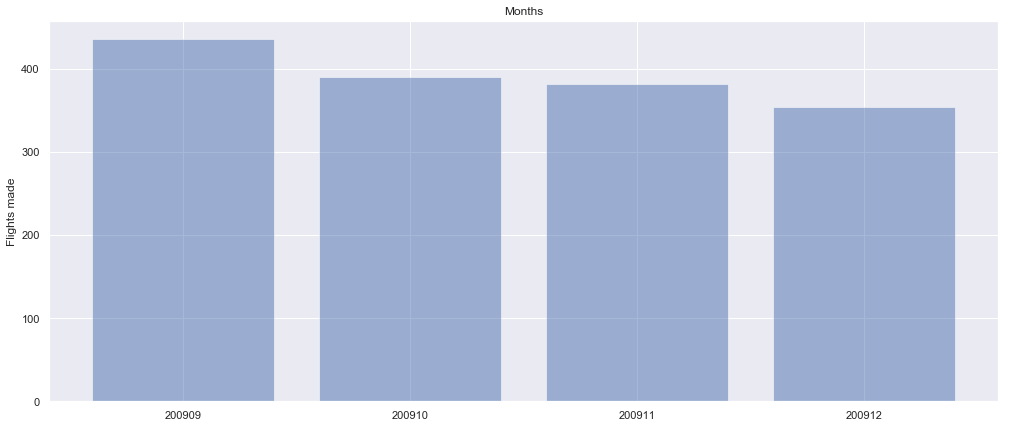

In [57]:
objects = (la_df['Fly_date'].unique())
y_pos = np.arange(len(objects))
performance = la_df['Fly_date'].value_counts()[0:4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Flights made')
plt.title('Months')

plt.show()

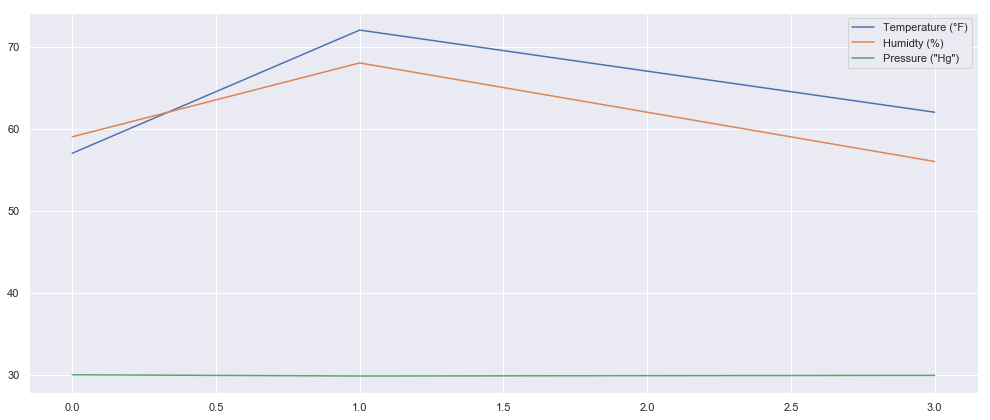

In [85]:
la_we.plot.line()

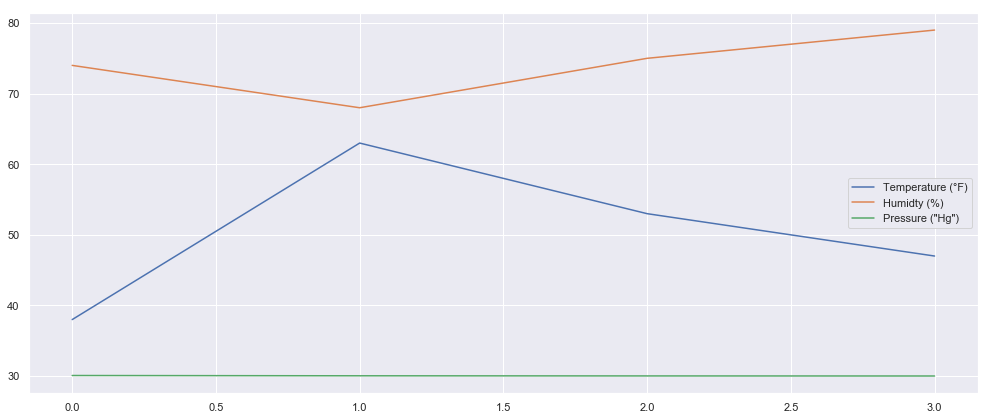

In [86]:
sea_we.plot.line()

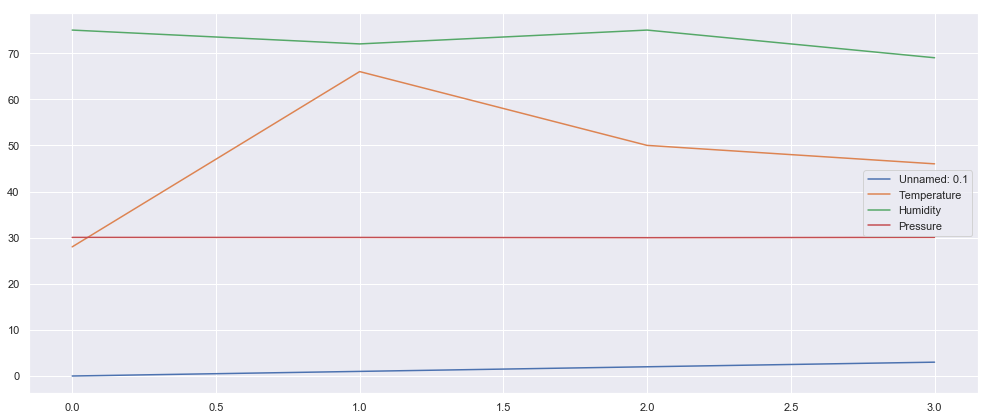

In [87]:
chi_we.plot.line()

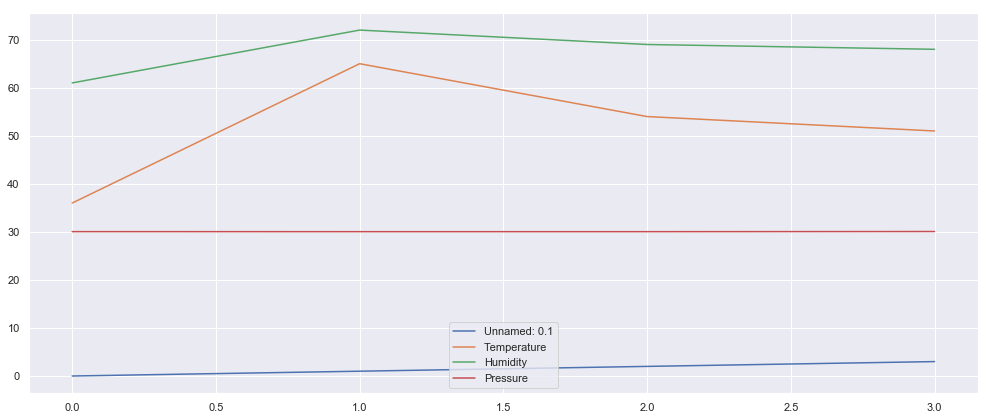

In [88]:
nyc_we.plot.line()

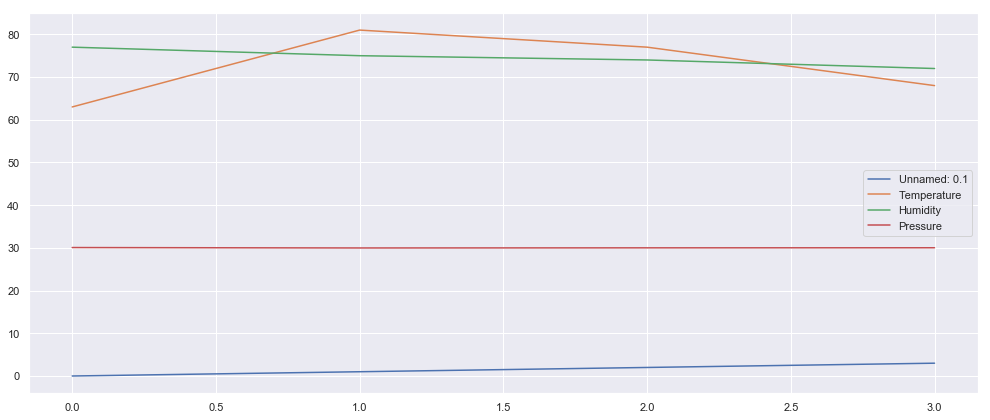

In [89]:
orl_we.plot.line()